## Dental Image Analysis : Tooth disease detection

### Load Initial Data

In [ ]:
!unzip teeth_dataset.zip

### Import Libraries

In [ ]:
import cv2
from skimage.util import random_noise
from keras.models import load_model
from keras.preprocessing import image
import image as pil_image
from keras import backend as K
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D
from keras import backend as K
from keras import regularizers
import numpy as np
from skimage import io 
from skimage.transform import rotate, AffineTransform, warp
import matplotlib.pyplot as plt
import random
from skimage import img_as_ubyte
import os
import warnings
warnings.filterwarnings('ignore')
#importing tensorflow
from sklearn.feature_extraction.text import CountVectorizer
from tensorflow.keras.layers import Dense,Input,Conv2D,MaxPool2D,Activation,Dropout,Flatten,BatchNormalization
from tensorflow.keras.models import Model
import random as rn
from tensorflow.keras import applications
from tensorflow.keras import optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, LearningRateScheduler, TensorBoard, EarlyStopping
from tensorflow.keras.models import Model, Sequential

## Height and widths of the dataset

In [ ]:
list_of_heights = []
list_of_widths = []
dir_path = "teeth_dataset/training/"
for i in os.listdir(dir_path):
    for image in os.listdir(os.path.join(dir_path,i)):
        img = cv2.imread(os.path.join(os.path.join(dir_path,i),image), cv2.IMREAD_UNCHANGED)
        # Dimensions of image
        shape = img.shape
        list_of_heights.append(shape[0])
        list_of_widths.append(shape[1])

In [ ]:
for i in os.listdir(dir_path):
    print("No of Images in ",i," category is ",len(os.listdir(os.path.join(dir_path,i))))

No of Images in  caries  category is  45
No of Images in  without_caries  category is  15


## Plotting

Text(0.5, 1.0, 'heights')

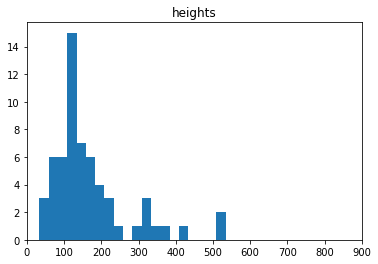

In [ ]:
plt.hist(list_of_heights,bins=20)
plt.xlim(0,900)
plt.title('heights')

(0.0, 900.0)

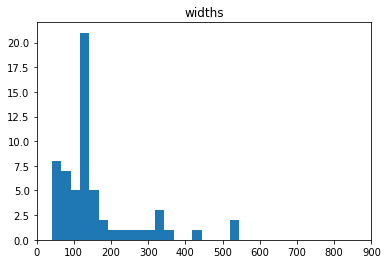

In [ ]:
plt.hist(list_of_widths,bins=20)
plt.title('widths')
plt.xlim(0,900)

In [ ]:
list_of_heights = []
list_of_widths = []
dir_path = "teeth_dataset/test/"
for i in os.listdir(dir_path):
    for image in os.listdir(os.path.join(dir_path,i)):
        img = cv2.imread(os.path.join(os.path.join(dir_path,i),image), cv2.IMREAD_UNCHANGED)
        # Dimensions of image
        shape = img.shape
        list_of_heights.append(shape[0])
        list_of_widths.append(shape[1])

In [ ]:
for i in os.listdir(dir_path):
    print("No of Images in ",i," category is ",len(os.listdir(os.path.join(dir_path,i))))

No of Images in  caries  category is  10
No of Images in  no-caries  category is  4


Text(0.5, 1.0, 'heights')

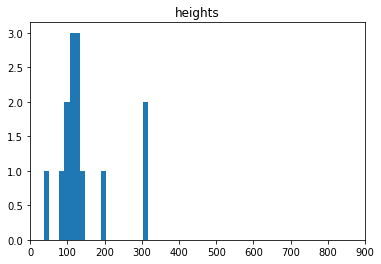

In [ ]:
plt.hist(list_of_heights,bins=20)
plt.xlim(0,900)
plt.title('heights')

(0.0, 900.0)

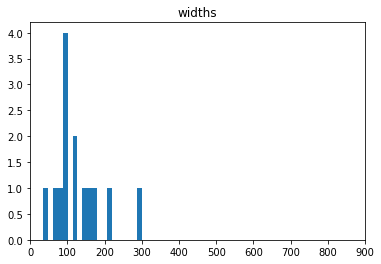

In [ ]:
plt.hist(list_of_widths,bins=20)
plt.title('widths')
plt.xlim(0,900)

##Model

In [ ]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(150, 150, 3)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))

model.add(Dropout(0.5))

model.add(Dense(1))
model.add(Activation('sigmoid'))
  
model.compile(loss='binary_crossentropy',optimizer=optimizers.Adam(learning_rate=0.1), metrics=['accuracy'])

## Summary

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 146, 146, 64)      18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 73, 73, 64)        0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 73, 73, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 341056)            0         
_________________________________________________________________
dense_10 (Dense)             (None, 128)               43655296  
_________________________________________________________________
dropout_6 (Dropout)          (None, 128)              

## Plotting the model

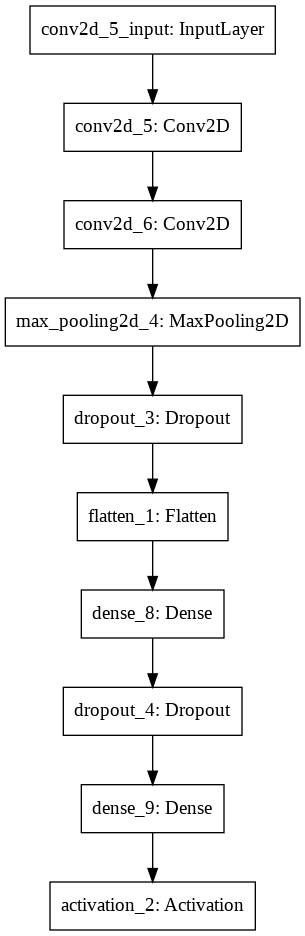

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model)

In [ ]:
image_shape=(150, 150, 3)
#Using to ImageDataGenerator to rescale image 
image_gen = ImageDataGenerator(rescale=1/255)
train_image_gen=image_gen.flow_from_directory('teeth_dataset/training',
                                             target_size=image_shape[:2],
                                             batch_size=1,
                                             class_mode='binary')#Because We have Cavity and no cavity


test_image_gen=image_gen.flow_from_directory('teeth_dataset/test',
                                             target_size=image_shape[:2],
                                             batch_size=1,
                                             class_mode='binary',
                                             seed=123#To help Visualize the results
                                             )

Found 60 images belonging to 2 classes.
Found 14 images belonging to 2 classes.


## Fit The model

In [ ]:
history =model.fit(train_image_gen,
                   epochs=80,)

Epoch 1/80
60/60 [==============================] - 15s 231ms/step - loss: 482252.2119 - accuracy: 0.6639
Epoch 2/80
60/60 [==============================] - 14s 230ms/step - loss: 10991.3975 - accuracy: 0.4425
Epoch 3/80
60/60 [==============================] - 14s 234ms/step - loss: 0.7772 - accuracy: 0.7118
Epoch 4/80
60/60 [==============================] - 14s 229ms/step - loss: 0.6022 - accuracy: 0.7976
Epoch 5/80
60/60 [==============================] - 14s 233ms/step - loss: 0.5837 - accuracy: 0.7631
Epoch 6/80
60/60 [==============================] - 14s 232ms/step - loss: 0.6090 - accuracy: 0.7064
Epoch 7/80
60/60 [==============================] - 14s 234ms/step - loss: 0.5446 - accuracy: 0.7605
Epoch 8/80
60/60 [==============================] - 14s 233ms/step - loss: 0.5946 - accuracy: 0.7222
Epoch 9/80
60/60 [==============================] - 14s 233ms/step - loss: 0.5013 - accuracy: 0.8139
Epoch 10/80
60/60 [==============================] - 14s 234ms/step - loss: 0.5688

##Evaluate  our Model

In [ ]:
model.evaluate(test_image_gen)

14/14 [==============================] - 1s 35ms/step - loss: 0.5999 - accuracy: 0.7143


[0.5999019742012024, 0.7142857313156128]

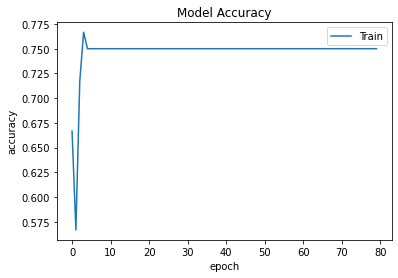

In [ ]:
plt.plot(history.history['accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'])
plt.show()

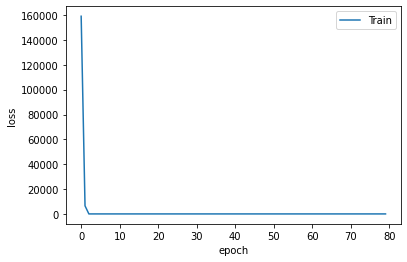

In [ ]:
plt.plot(history.history['loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'])
plt.show()

##Predict

cavity infected tooth


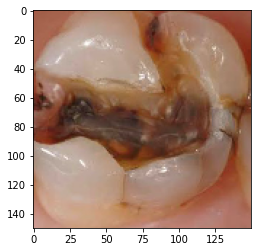

cavity infected tooth


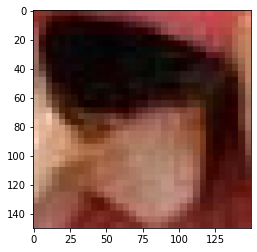

cavity infected tooth


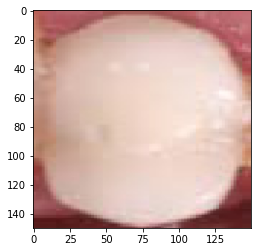

cavity infected tooth


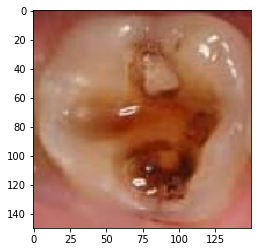

cavity infected tooth


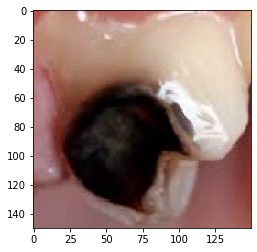

cavity infected tooth


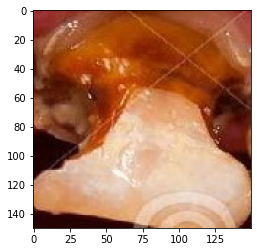

cavity infected tooth


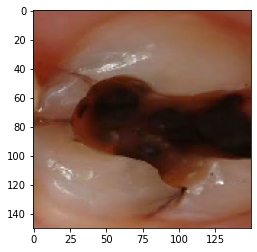

cavity infected tooth


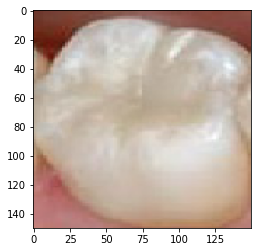

cavity infected tooth


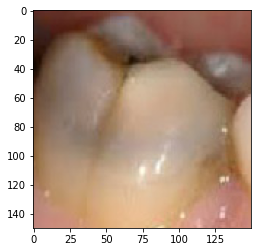

cavity infected tooth


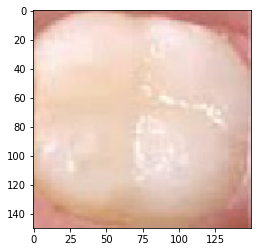

cavity infected tooth


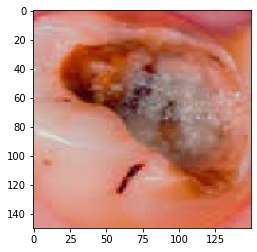

cavity infected tooth


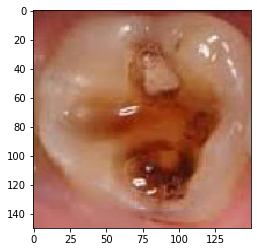

cavity infected tooth


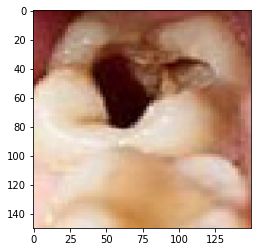

cavity infected tooth


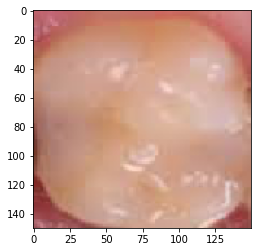

In [ ]:
for _ in range(14):
    img, label = test_image_gen.next()
    prediction =model.predict_classes(img)
    if prediction[0][0]==0:
        print("cavity infected tooth")
    else:
      print("Healthy tooth")
    plt.imshow(img[0])
    plt.show()